In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize, least_squares

## Problem 1

a. Each Derivative was found to equal 0 evaluated at the point 0.5.

b. Construction shown in code below. Plots are shown below. Note: For these plots I graphed with respect to the variable x (the input vector). 


In [2]:
# 1.a
x = tf.Variable(0.5)
def nder(n):

    with tf.GradientTape() as tape:
        y = x
        for i in range(5):
            y = 3.5 * y * (1 - y)

    dy_dx = tape.gradient(y,x)
    print("Derivative g_" + str(n) +" = " + str(dy_dx.numpy()))

nder(1)
nder(10)
nder(100)
nder(1000)

Derivative g_1 = 0.0
Derivative g_10 = 0.0
Derivative g_100 = 0.0
Derivative g_1000 = 0.0


### Plot 1

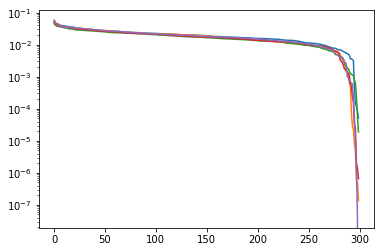

In [16]:
# 1.b
def f(x,theta,dims,sigma=tf.tanh):
    n_i, n_h, n_0 = dims
    # w1,b1,w2,b2 = theta[:n_h], theta[n_h: 2*n_h], theta[2*n_h:2*n_h+n_0], theta[2*n_h+n_0:]
    w1,b1,w2,b2 = theta[0], theta[1], theta[2], theta[3]

    with tf.GradientTape() as tape:
        y = sigma(w2@sigma(w1@x+b1)+b2)
        loss = tf.reduce_mean(train_outputs - y)
    
    return tape.gradient(loss, x)


for j in range(5):
    # tanh
    sing_vals = []
    for i in range(300):
        dims = [1,100,1]
        w1 = tf.Variable(tf.random.normal(shape=(100,1)))
        b1 = tf.random.normal(shape=(1,))
        w2 = tf.random.normal(shape=(1,100))
        b2 = tf.random.normal(shape=(1,))
        theta = [w1, b1, w2, b2]
        x =  tf.Variable(tf.random.uniform(shape=(1,1000),minval=-10., maxval=10.))
        train_outputs = 3.5 * x * (1 - x)
        J = f(x, theta, dims)
        sing_vals.append(tf.linalg.svd(J,compute_uv=False)[0])
    plt.plot([i for i in range(300)],tf.sort(sing_vals, direction="DESCENDING").numpy())
    plt.yscale('log')

### Plot 2

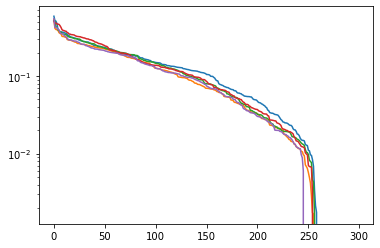

In [17]:
# ReLu

for j in range(5):
    sing_vals = []
    for i in range(300):
        dims = [1,100,1]
        w1 = tf.random.normal(shape=(100,1))
        b1 = tf.random.normal(shape=(1,))
        w2 = tf.random.normal(shape=(1,100))
        b2 = tf.random.normal(shape=(1,))
        theta = [w1, b1, w2, b2]
        x =  tf.Variable(tf.random.uniform(shape=(1,1000),minval=-10., maxval=10.))
        train_outputs = 3.5 * x * (1 - x)
        J = f(x, theta, dims, sigma=tf.nn.relu)
        sing_vals.append(tf.linalg.svd(J,compute_uv=False)[0])

    plt.plot([i for i in range(300)],tf.sort(sing_vals, direction="DESCENDING").numpy())
    plt.yscale('log')

## Problem 2

a. The Hessian matrix is defined by:

$$ H = \frac{d^2C(\theta)}{d\theta_u d \theta_v}$$

Then taking the first partial derivative:

$$ \frac{dC(\theta)}{d\theta_u} = \frac{de(\theta)^T}{d\theta_u}S^{-1}e(\theta)$$

$$ = \frac{-df_\theta(x)^T}{d\theta_u}S^{-1}e(\theta)$$

Then taking the second partial derivative:

$$ H = \frac{d^2C(\theta)}{d\theta_u d \theta_v} = \frac{d}{d\theta_v} \frac{-df_\theta(x)^T}{d\theta_u}S^{-1}e(\theta)$$

$$ = \frac{-df_\theta(x)}{d\theta_u d\theta_v}S^{-1}e(\theta) + \frac{-df_\theta(x)^T}{d\theta_u}S^{-1}\frac{df_\theta(x)^T}{d\theta_v}$$


b. The Fisher Information matrix is the Hessian averaged: $F = <H>$. Thus, 

$$F = \frac{-df_\theta(x)^T}{d\theta_u}S^{-1}\frac{df_\theta(x)^T}{d\theta_v}>$$

$$\implies F = J^Ts^{-1}J$$

## Problem 3

a. $min_\theta ||f_{\theta_0}(t) - f_{\theta}(t)||$

b. Contour Plot Below.

c. Plots Below. It would be very difficult to distinguish between the two fits based on the plots shown below (in part 3c below).

d. Plots Below. The three methods I used were Levenberg-Marquardt, Powell, and Nelder-Mead. Levenberg-Marquardt had the fewest iterations.

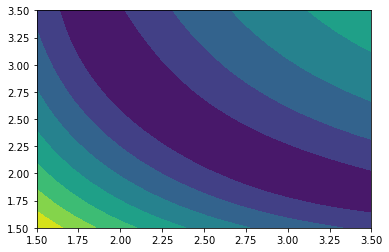

In [123]:
# 3a - formulate times and output y (f_theta_0)
times = np.linspace(0,10,21)

y = lambda theta, times : [(0.5 * (tf.exp(-1*theta[0]*t) + tf.exp(-1*theta[1]*t))).numpy() for t in times]
b = y([2,3], times) # true values
b = np.array(b)

# 3b - Contours
def plot_cost(t1, t2):
    out = np.zeros((20,20))
    print
    for i in range(len(t1)):
        for j in  range(len(t2)):
            out[i][j] = np.linalg.norm(np.array([y([t1[i],t2[j]],times)[k] - b[k] for k in range(len(times))]),2)
    return out

theta1 = np.linspace(1.5,3.5,20)
theta2 = np.linspace(1.5,3.5,20)
c = plot_cost(theta1, theta2)
theta1,theta2 = np.meshgrid(theta1,theta2)
plt.contourf(theta1, theta2, c)

Cost: 0.006613867349934266 ---- Theta: [2.41599029]


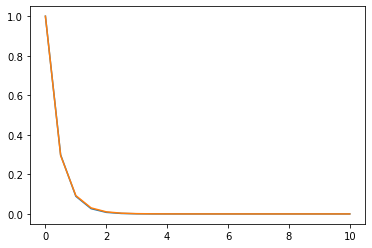

In [65]:
# 3c
y = lambda theta, t : 0.5 * (np.exp(-1*theta[0]*t) + np.exp(-1*theta[1]*t))
b = y([2,3], times) # true values
b = np.array(b)

def cost(theta):
    out = [y([theta,theta],times[k])[0] - b[k] for k in range(len(times))]
    return np.linalg.norm(out)

v = minimize(cost, 2.5)
theta = v["x"]
print("Cost: " + str(cost(theta)) + " ---- Theta: " + str(theta))

plt.plot(times, y([theta,theta], times))
plt.plot(times, y([2,3],times))

Powell. Cost: 1.196618123838562e-14 ---- Theta: [2. 3.]


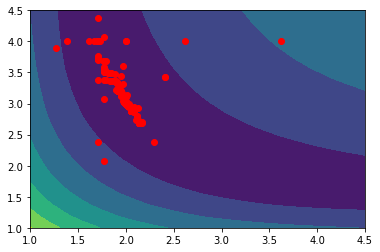

In [130]:
# 3d - Contours
y = lambda theta, t : 0.5 * (np.exp(-1*theta[0]*t) + np.exp(-1*theta[1]*t))
times = np.linspace(0,10,21)


theta_vals = []
def cost(theta):
    out = [y(theta,times[k]) - b[k] for k in range(len(times))]
    if theta[0] < 4.5 and theta[1] < 4.5 and theta[0] > 1.0 and theta[1] > 1.0:
        theta_vals.append(theta)
    return np.linalg.norm(out)

# 3b - Contours
def F(theta):
    out = [y(theta,times[k]) - b[k] for k in range(len(times))]
    return np.array(out)

# methods = ['Powell', "Nelder-Mead","lm"]
m = 'Powell'
starting_point = [1,4]
p = np.array(starting_point)

theta_vals = []
theta = minimize(cost, p, method=m)["x"]
print(m + ". Cost: " + str(cost(theta)) + " ---- Theta: " + str(theta))

times = np.linspace(0,10,21)
y = lambda theta, times : [(0.5 * (tf.exp(-1*theta[0]*t) + tf.exp(-1*theta[1]*t))).numpy() for t in times]
b = y([2,3], times) # true values
b = np.array(b)

theta1 = np.linspace(1.0,4.5,20)
theta2 = np.linspace(1.0,4.5,20)
c = plot_cost(theta1, theta2)
theta1,theta2 = np.meshgrid(theta1,theta2)
plt.contourf(theta1, theta2, c)

x = [theta_vals[i][0] for i in range(len(theta_vals))]
y = [theta_vals[i][1] for i in range(len(theta_vals))]
plt.scatter(x, y, color="red")

Nelder-Mead. Cost: 1.6629523031006877e-06 ---- Theta: [2.00004234 2.99993035]


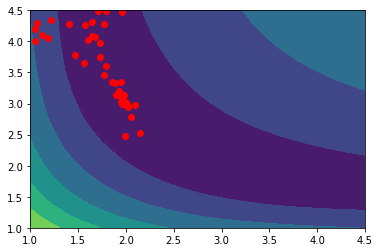

In [133]:
# 3d - Contours
y = lambda theta, t : 0.5 * (np.exp(-1*theta[0]*t) + np.exp(-1*theta[1]*t))
times = np.linspace(0,10,21)


theta_vals = []
def cost(theta):
    out = [y(theta,times[k]) - b[k] for k in range(len(times))]
    if theta[0] < 4.5 and theta[1] < 4.5 and theta[0] > 1.0 and theta[1] > 1.0:
        theta_vals.append(theta)
    return np.linalg.norm(out)

# 3b - Contours
def F(theta):
    out = [y(theta,times[k]) - b[k] for k in range(len(times))]
    return np.array(out)

m = 'Nelder-Mead'
starting_point = [1,4]
p = np.array(starting_point)

theta_vals = []
theta = minimize(cost, p, method=m)["x"]
print(m + ". Cost: " + str(cost(theta)) + " ---- Theta: " + str(theta))

times = np.linspace(0,10,21)
y = lambda theta, times : [(0.5 * (tf.exp(-1*theta[0]*t) + tf.exp(-1*theta[1]*t))).numpy() for t in times]
b = y([2,3], times) # true values
b = np.array(b)

theta1 = np.linspace(1.0,4.5,20)
theta2 = np.linspace(1.0,4.5,20)
c = plot_cost(theta1, theta2)
theta1,theta2 = np.meshgrid(theta1,theta2)
plt.contourf(theta1, theta2, c)

x = [theta_vals[i][0] for i in range(len(theta_vals))]
y = [theta_vals[i][1] for i in range(len(theta_vals))]
plt.scatter(x, y, color="red")

lm. Cost: 5.579626320683401e-17 ---- Theta: [2. 3.]


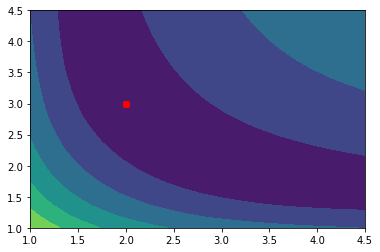

In [135]:
# 3d - Contours
y = lambda theta, t : 0.5 * (np.exp(-1*theta[0]*t) + np.exp(-1*theta[1]*t))
times = np.linspace(0,10,21)


theta_vals = []
def cost(theta):
    out = [y(theta,times[k]) - b[k] for k in range(len(times))]
    if theta[0] < 4.5 and theta[1] < 4.5 and theta[0] > 1.0 and theta[1] > 1.0:
        theta_vals.append(theta)
    return np.linalg.norm(out)

# 3b - Contours
def F(theta):
    out = [y(theta,times[k]) - b[k] for k in range(len(times))]
    if theta[0] < 4.5 and theta[1] < 4.5 and theta[0] > 1.0 and theta[1] > 1.0:
        theta_vals.append(theta)
    return np.array(out)

m = 'lm'
starting_point = [1,4]
p = np.array(starting_point)
theta = least_squares(F, p, method=m)["x"]
print(m + ". Cost: " + str(cost(theta)) + " ---- Theta: " + str(theta))

x = [theta_vals[i][0] for i in range(len(theta_vals))]
y = [theta_vals[i][1] for i in range(len(theta_vals))]
plt.scatter(x, y, color="red")

times = np.linspace(0,10,21)
y = lambda theta, times : [(0.5 * (tf.exp(-1*theta[0]*t) + tf.exp(-1*theta[1]*t))).numpy() for t in times]
b = y([2,3], times) # true values
b = np.array(b)

theta1 = np.linspace(1.0,4.5,20)
theta2 = np.linspace(1.0,4.5,20)
c = plot_cost(theta1, theta2)
theta1,theta2 = np.meshgrid(theta1,theta2)
plt.contourf(theta1, theta2, c)

x = [theta_vals[i][0] for i in range(len(theta_vals))]
y = [theta_vals[i][1] for i in range(len(theta_vals))]
plt.scatter(x, y, color="red")

## Problem 4

4.a - Condition Number :

Starting Point: [50, 150, -100, 1, 2] --- Jacob Cond Num: 1.92e+30 --- FIM Cond Num: 9.76e+41

Starting Point: [0.5, 1.5, -1, 0.01, 0.02] --- Jacob Cond Num: 1.12e9 --- FIM Cond Num: 1.252e+18

Starting Point: [0.37541005, 1.93584691, -1.46468714, 0.01286753, 0.0221227] --- Jacob Cond Num: 2.38e9 --- FIM Cond Num: 5.69e+18

4.b Create Table (also might need a few more models)

['Powell', "Nelder-Mead", "CG", "lm", "trf"]

                    Point 1         Point 2     Point 3

Powell ------       Fail            Pass        Pass

Nelder-Mead -       Fail            Pass        Pass

CG ----------       Fail            Pass        Pass

lm ----------       Pass            Pass        Pass

trf ---------       Pass            Pass        Pass

4.c At these points we had values:

                    Point 1         Point 2     Point 3

Powell ------       2.84e+17        Pass        Pass

Nelder-Mead -       5.57e+26        Pass        Pass

CG ----------       6.28e+22        Pass        Pass

lm ----------       Pass            Pass        Pass

trf ---------       Pass            Pass        Pass


This tells us that at these points the Jacobian Matrices are close to singular.


In [137]:
#4a
import tensorflow as tf
import numpy as np

starting_points = [[50, 150, -100, 1, 2], [0.5, 1.5, -1, 0.01, 0.02], [0.37541005, 1.93584691, -1.46468714, 0.01286753, 0.0221227]]
times = [i*10 for i in range(33)]
b = [0.844, 0.908, 0.932, 0.936, 0.925, 0.908, 0.881, 0.85, 0.818, 0.784, 0.751, 0.718, 0.685, 0.658, 0.628, 0.603,
0.58, 0.558, 0.538, 0.522, 0.506, 0.49, 0.478, 0.467, 0.457, 0.448, 0.438, 0.431, 0.424, 0.42, 0.414, 0.411, 0.406]
print(times)

def jacob(theta):
    c1 = np.ones(len(times))
    c2 = [np.exp(-1*theta[3]*t) for t in times]
    c3 = [np.exp(-1*theta[4]*t) for t in times]
    c4 = [-1*t*theta[1] * np.exp(-1*theta[3]*t) for t in times]
    c5 = [-1*t*theta[2] * np.exp(-1*theta[4]*t) for t in times]
    return -np.row_stack([c1,c2,c3,c4,c5]).T


def FIM(theta):
    j = jacob(theta)
    return j.T @ j

# then calculate the Jacobian and the Fisher Information Matrix
for p in starting_points:
    s = np.linalg.svd(jacob(p))[1]
    k1 = str(np.round((s[0]/s[-1])**2,2))

    s = np.linalg.svd(FIM(p))[1]
    k2 = str(np.round((s[0]/s[-1])**2,2))
    
    print("Starting Point: " + str(p) + " --- Jacob Cond Num: " + k1 + " --- FIM Cond Num: " + k2)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]
Starting Point: [50, 150, -100, 1, 2] --- Jacob Cond Num: 1.9279654381434453e+30 --- FIM Cond Num: 9.763305664354983e+41
Starting Point: [0.5, 1.5, -1, 0.01, 0.02] --- Jacob Cond Num: 1119293567.29 --- FIM Cond Num: 1.2528180893565578e+18
Starting Point: [0.37541005, 1.93584691, -1.46468714, 0.01286753, 0.0221227] --- Jacob Cond Num: 2385573989.27 --- FIM Cond Num: 5.690963275960009e+18


In [138]:
# 4b

def F(guess):
    out = np.array([y(guess,times[i]) - b[i] for i in range(len(times))])
    return np.linalg.norm(out,2)

def residuals(guess):
    return np.array([y(guess,times[i]) - b[i] for i in range(len(times))])


p = np.array(starting_points[0])
b = np.array(b)
times = np.array(times)
y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)


methods = ['Powell', "Nelder-Mead", "CG", "lm", "trf"]
for p in starting_points:
    print("Starting Point: ", p)
    p = np.array(p)
    for m in methods:
        if m == "lm" or m == "trf":
            theta = least_squares(residuals, p, method=m)["x"]
        else:
            theta = minimize(F, p, method=m)["x"]
        print(m + ". Cost: " + str(F(theta)))

    print("  ----------  ")

Starting Point:  [50, 150, -100, 1, 2]
Powell. Cost: 1.0109633747983404
Nelder-Mead. Cost: 1.0513740114608618
CG. Cost: 1.0111538125241526


C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in double_scalars
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)
C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in exp
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)
c:\Users\davee\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in double_scalars
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)
C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in exp
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-

lm. Cost: 0.007392492609054573
trf. Cost: 0.008929560667044598
  ----------  
Starting Point:  [0.5, 1.5, -1, 0.01, 0.02]
Powell. Cost: 0.009279103292696444
Nelder-Mead. Cost: 0.007392492804507552
CG. Cost: 0.008771831247490933
lm. Cost: 0.007392492609084878
trf. Cost: 0.0073924926090483435
  ----------  
Starting Point:  [0.37541005, 1.93584691, -1.46468714, 0.01286753, 0.0221227]
Powell. Cost: 0.007392492618731392
Nelder-Mead. Cost: 0.007392492626591448
CG. Cost: 0.007392492672995602
lm. Cost: 0.007392492609052481
trf. Cost: 0.007392492609049482
  ----------  


In [141]:
# 4c
methods = ['Powell', "Nelder-Mead", "CG", "lm", "trf"]

p = starting_points[0]
for m in methods:
    if m == "lm" or m == "trf":
        theta = least_squares(residuals, p, method=m)["x"]
    else:
        theta = minimize(F, p, method=m)["x"]

    j = jacob(theta)
    s = np.linalg.svd(j)[1]
    
    print("Method: " + m + ", Condition: ", np.linalg.cond(FIM(theta)))
    print("Singular Value: ", s[0])

    print("  ----------  ")

Method: Powell, Condition:  2.846876924867201e+17
Singular Value:  5.813384587210416
  ----------  
Method: Nelder-Mead, Condition:  5.570474233279963e+26
Singular Value:  5.7501640758212895
  ----------  
Method: CG, Condition:  6.286068553258493e+22
Singular Value:  5.78082073333999
  ----------  


C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in double_scalars
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)
C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in exp
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)
c:\Users\davee\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in double_scalars
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-1*theta[4]*t)
C:\Users\davee\AppData\Local\Temp\ipykernel_20052\2768226274.py:14: RuntimeWarning: overflow encountered in exp
  y = lambda theta, t : theta[0] + theta[1]*np.exp(-1*theta[3]*t) + theta[2]*np.exp(-

Method: lm, Condition:  2385563496.5352077
Singular Value:  218.2826847489956
  ----------  
Method: trf, Condition:  2.8803668695284764e+20
Singular Value:  4720.159020623949
  ----------  


In [133]:
# 5 
times = []
b = []

with open("ENSO.txt") as f:
    lines = f.readlines()

    for l in lines:
        temp = l.split()
        times.append(float(temp[0]))
        b.append(float(temp[1]))

b = np.array(b)
times = np.array(times)

## Problem 5

5.a - Of the seven terms in our model, $\theta_1$ is the only term that is not oscilating. We are given that these signals are cyclic thus it would be reasonable to assume that $\theta_1$ corresponds to the average value of the data.

5.b - Once we assume that $\theta_1$ is the average value of the data, then it follows that the other theta terms correspond to to the variation from the mean. Thus it would be reasonable to set these terms within the range of the variance within the dataset given.

5.c - $\theta_4$ and $\theta_7$ are the only variables included inside the trigonometric functions, scaling the time (multiplied by 2 pi). This results in a change in the osicilations of these trig functions. Since these are the only variables included $\theta_4$ and $\theta_7$ correspond to the period of these two signals within the model. The longest period is simply the length of our dataset (as suggested in the solutions I will estimate this with a period of 100). Thus our range is set by [2,100].

5.d - When the parameters $\theta_4$ and $\theta_7$ are set to extreme values the norm of the derivatives becomes increasing small (for large extreme values) or increasing large (for small extreme values).

5.f - There are initial parameter values where the fitting algorithms fail. Once such example is [10.5, 0.1,0.1,0.00001,1000,100,0.0001,0.1,10000]. I also found that the most significant way to create a poor initial point was to set our initial theta_1 far from the average of the data (in part a we found that setting theta_1 equal to this average was optimal). 

My Optimal Set of Parameters was found to be: [10.54445781,3.06769519,0.46487816,46.4961315,-0.97311921,1.22605391, 35.1657935,1.16020155,0.51333658].

5.g - Variance:  [0.0011122460587239028, 0.002220973094859271, 0.0022285611871474607, 0.011742311444811275, 0.0023750518645727727, 6642966130848.247, 0.005874011085691428, 0.002230975355825641, 6642966130848.248]. Something weird happens with my last parameter...


My plot for the found solution vs the dataset:


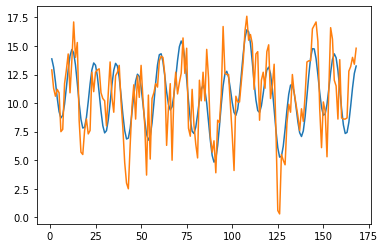

In [179]:
# plot for 5.g
plt.plot(times, [y([10.54445781,3.06769519,0.46487816,46.4961315,-0.97311921,1.22605391, 35.1657935,1.16020155,0.51333658],t) for t in times])
plt.plot(times,b)

In [166]:
# 5.d
theta_1 = np.average(b)
var = np.average([b_val**2 for b_val in b]) - theta_1**2
dev = theta_1
dF_d4 = 0
dF_d7 = 0


for theta_test in range(3,101):
    dF_d4 += np.array([2*np.pi*t*dev/theta_test**2*np.sin(2*np.pi*t/theta_test) - 2*np.pi*t*dev/theta_test**2*np.cos(2*np.pi*t/theta_test) for t in times])
    dF_d7 += np.array([2*np.pi*t*dev/theta_test**2*np.sin(2*np.pi*t/theta_test) - 2*np.pi*t*dev/theta_test**2*np.cos(2*np.pi*t/theta_test) for t in times])

print("dF/dtheta_4", np.linalg.norm(dF_d4,2)/98)
print("dF/dtheta_7", np.linalg.norm(dF_d7,2)/98)

theta_test = 10000

print("theta = 10000")
print("dF/dtheta_4", np.linalg.norm(np.array([2*np.pi*t*dev/theta_test**2*np.sin(2*np.pi*t/theta_test) - 2*np.pi*t*dev/theta_test**2*np.cos(2*np.pi*t/theta_test) for t in times]),2))
print("dF/dtheta_7", np.linalg.norm(np.array([2*np.pi*t*dev/theta_test**2*np.sin(2*np.pi*t/theta_test) - 2*np.pi*t*dev/theta_test**2*np.cos(2*np.pi*t/theta_test) for t in times]),2))

theta_test = 0.00001

print("theta = 0.00001")
print("dF/dtheta_4", np.linalg.norm(np.array([2*np.pi*t*dev/theta_test**2*np.sin(2*np.pi*t/theta_test) - 2*np.pi*t*dev/theta_test**2*np.cos(2*np.pi*t/theta_test) for t in times]),2))
print("dF/dtheta_7", np.linalg.norm(np.array([2*np.pi*t*dev/theta_test**2*np.sin(2*np.pi*t/theta_test) - 2*np.pi*t*dev/theta_test**2*np.cos(2*np.pi*t/theta_test) for t in times]),2))



dF/dtheta_4 122.80090315824043
dF/dtheta_7 122.80090315824043
theta = 10000
dF/dtheta_4 0.000774780480145081
dF/dtheta_7 0.000774780480145081
theta = 0.00001
dF/dtheta_4 844358427497758.9
dF/dtheta_7 844358427497758.9


In [158]:
# 5.f
times = []
b = []

with open("ENSO.txt") as f:
    lines = f.readlines()

    for l in lines:
        temp = l.split()
        times.append(float(temp[0]))
        b.append(float(temp[1]))

b = np.array(b)
times = np.array(times)
starting_points = [[theta_1, 15,15,0.0001,15,15,0.0001,15,15], [theta_1, 15,15,0.0001,15,15,1000,15,15], [theta_1, 15,15,1000,15,15,0.0001,15,15], [theta_1, 15,15,1000,15,15,1000,15,15],
[theta_1, theta_1,theta_1,50,theta_1,theta_1,50,theta_1,theta_1],[theta_1, 1,1,0.0001,100,100,0.0001,1,100]]


bad_starting = [[theta_1, 0.1,0.1,0.00001,1000,100,0.0001,0.1,10000]]

y = lambda theta, t : theta[0] + theta[1]*np.cos(2*np.pi*t/12) + theta[2]*np.sin(2*np.pi*t/12) + theta[4]*np.cos(2*np.pi*t/theta[3]) + theta[5]*np.sin(2*np.pi*t/theta[3]) + theta[7]*np.cos(2*np.pi*t/theta[6]) + theta[8]*np.sin(2*np.pi*t/theta[6])

def G(guess):
    out = np.array([y(guess,times[i]) - b[i] for i in range(len(times))])
    return np.linalg.norm(out,2)

def res(guess):
    return np.array([y(guess,times[i]) - b[i] for i in range(len(times))])

theta4_vals = []
theta7_vals = []
for p in [[10.54445781,  3.06769519,  0.46487816, 46.4961315,  -0.97311921,  1.22605391,
 35.1657935,   1.16020155,  0.51333658]]:
    print("Starting Point: ", p)
    p = np.array(p)
    theta = least_squares(res, p, method="lm")["x"]
    # theta = minimize(G, p)["x"]
    print("Cost: " + str(G(theta)))
    print(theta)

Starting Point:  [10.54445781, 3.06769519, 0.46487816, 46.4961315, -0.97311921, 1.22605391, 35.1657935, 1.16020155, 0.51333658]
Cost: 29.207054395751904
[10.54445554  3.06769441  0.46488408 46.4959008  -0.97321013  1.2260144
 35.16551027  1.1601406   0.51345257]


In [174]:
print(len(times))

168


In [177]:
def jacob(theta):
    c1 = np.ones(len(times))
    c2 = [np.cos(2*np.pi*t/12) for t in times]
    c3 = [np.sin(2*np.pi*t/12) for t in times]
    c4 = [2*np.pi*t*theta[4]/theta[3]**2*np.sin(2*np.pi*t/theta[3]) - 2*np.pi*t*theta[5]/theta[3]**2*np.cos(2*np.pi*t/theta[3]) for t in times]
    c5 = [np.cos(2*np.pi*t/theta[4]) for t in times]
    c6 = [np.sin(2*np.pi*t/theta[7]) for t in times]
    c7 = [2*np.pi*t*theta[7]/theta[6]**2*np.sin(2*np.pi*t/theta[6]) - 2*np.pi*t*theta[8]/theta[6]**2*np.cos(2*np.pi*t/theta[6]) for t in times]
    c8 = [np.cos(2*np.pi*t/theta[7]) for t in times]
    c9 = [np.sin(2*np.pi*t/theta[7]) for t in times]
    return np.row_stack([c1,c2,c3,c4,c5,c6,c7,c8,c9]).T

def FIM(theta):
    j = jacob(theta)
    return j.T @ j

F = FIM([10.54445781,3.06769519,0.46487816,46.4961315,-0.97311921,1.22605391, 35.1657935,1.16020155,0.51333658])
sigma = 29.207054395751904/np.sqrt(168-9)
v = np.linalg.inv(F)/sigma**2
v = [v[i][i] for i in range(len(v))]
print("Variance: ", v)

Variance:  [0.0011122460587239028, 0.002220973094859271, 0.0022285611871474607, 0.011742311444811275, 0.0023750518645727727, 6642966130848.247, 0.005874011085691428, 0.002230975355825641, 6642966130848.248]
